In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')


df = pd.concat([X, y], axis=1)
df['species'] = df['species'].map(dict(enumerate(iris.target_names)))  # Convert to class labels

# Explore
print("Shape:", df.shape)
print("\nClasses:\n", df['species'].value_counts())
df.head()


Shape: (150, 5)

Classes:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


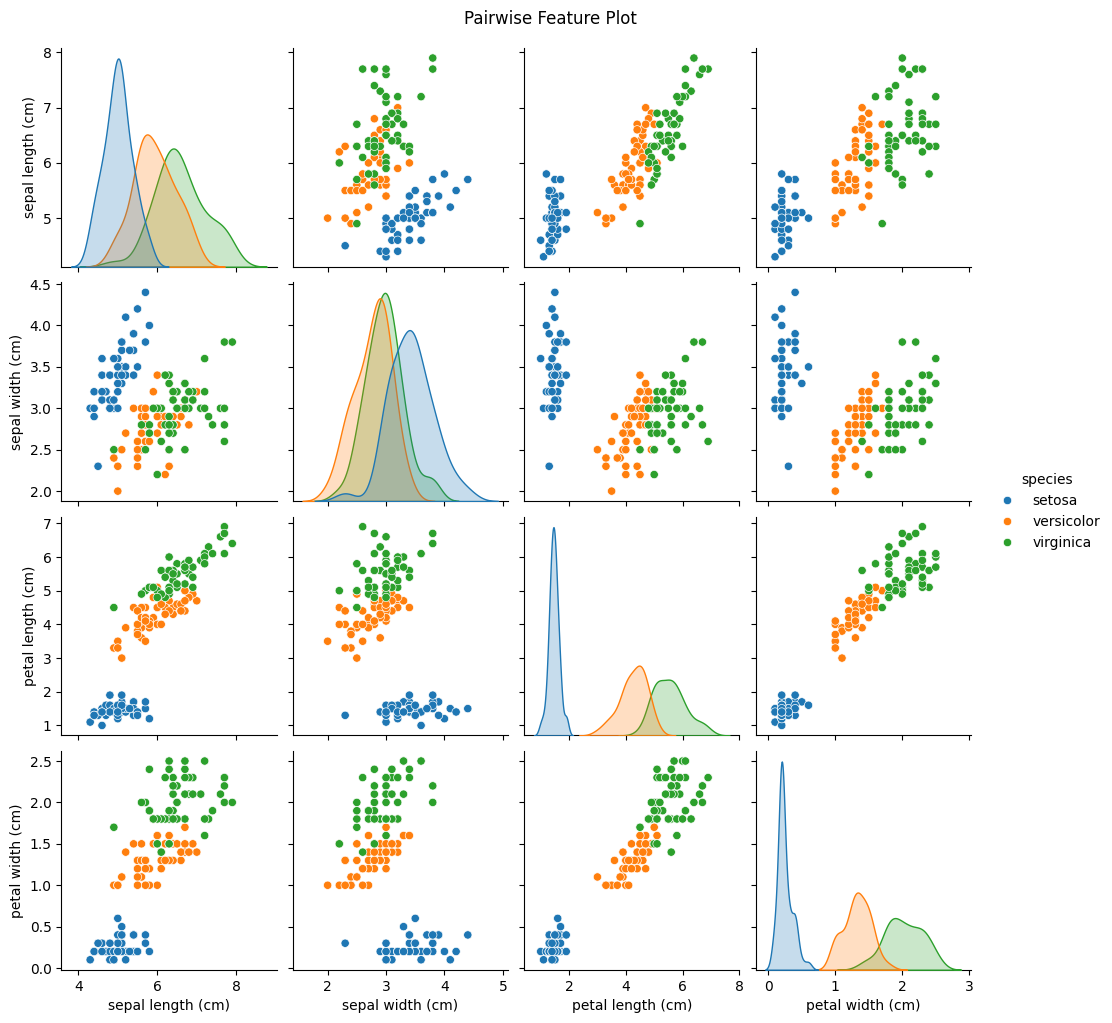

In [ ]:

sns.pairplot(df, hue='species')
plt.suptitle("Pairwise Feature Plot", y=1.02)
plt.show()


In [ ]:

y_encoded = pd.Series(iris.target, name='species')


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



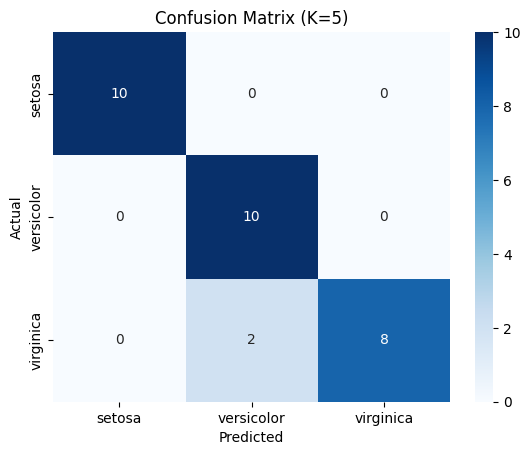

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (K=5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


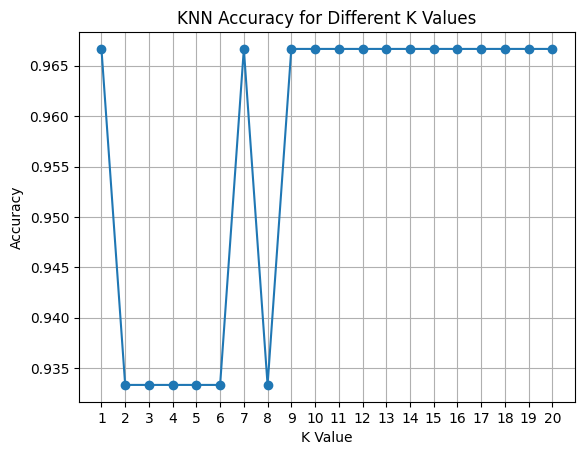

In [ ]:
k_values = range(1, 21)
scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))


plt.plot(k_values, scores, marker='o')
plt.xticks(k_values)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.grid(True)
plt.show()


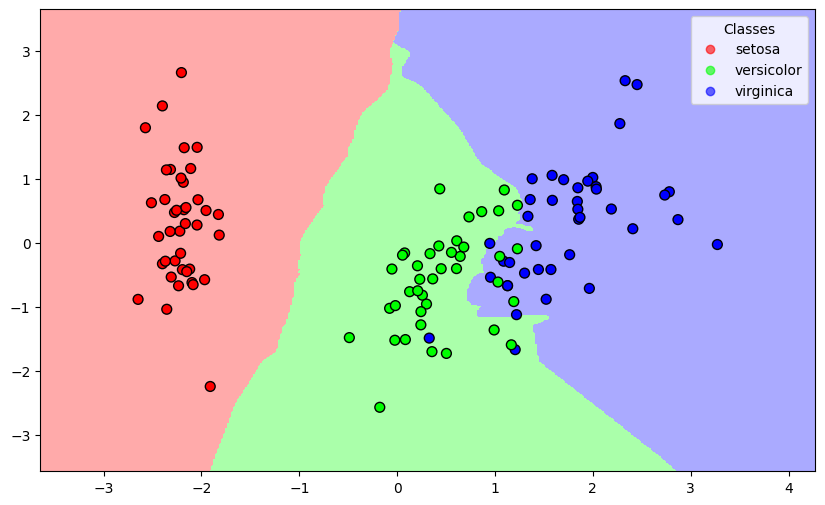

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_scaled)
X_test_2D = pca.transform(X_test_scaled)


knn_2D = KNeighborsClassifier(n_neighbors=5)
knn_2D.fit(X_train_2D, y_train)

h = 0.02
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

scatter = plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50)


handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)


plt.legend(handles=handles, labels=list(iris.target_names), title="Classes")

